## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}

for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %.6f" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch_size-%s" % str(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0812 08:47:34.553090  7596 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0812 08:47:34.554052  7596 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0812 08:47:34.599928  7596 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 08:47:34.601924  7596 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 08:47:34.603919  7596 

Experiment with BATCH_SIZE = 2.000000


W0812 08:47:34.942039  7596 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 08:47:35.038796  7596 deprecation.py:323] From C:\Users\an_fl\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 400s 8ms/step - loss: 2.2649 - acc: 0.1505 - val_loss: 2.9058 - val_acc: 0.1727
Epoch 49/50
50000/50000 [==============================] - 389s 8ms/step - loss: 2.2621 - acc: 0.1501 - val_loss: 2.7675 - val_acc: 0.1657
Epoch 50/50
50000/50000 [==============================] - 392s 8ms/step - loss: 2.2625 - acc: 0.1520 - val_loss: 2.6717 - val_acc: 0.1652
Experiment with BATCH_SIZE = 16.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)       

50000/50000 [==============================] - 50s 1ms/step - loss: 1.0951 - acc: 0.6118 - val_loss: 1.3909 - val_acc: 0.5190
Epoch 47/50
50000/50000 [==============================] - 50s 1ms/step - loss: 1.0988 - acc: 0.6126 - val_loss: 1.3671 - val_acc: 0.5255
Epoch 48/50
50000/50000 [==============================] - 50s 1000us/step - loss: 1.0936 - acc: 0.6121 - val_loss: 1.3603 - val_acc: 0.5293
Epoch 49/50
50000/50000 [==============================] - 50s 1ms/step - loss: 1.0886 - acc: 0.6154 - val_loss: 1.3575 - val_acc: 0.5323
Epoch 50/50
50000/50000 [==============================] - 50s 1ms/step - loss: 1.0824 - acc: 0.6172 - val_loss: 1.3656 - val_acc: 0.5274
Experiment with BATCH_SIZE = 32.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (D

Epoch 44/50
50000/50000 [==============================] - 25s 497us/step - loss: 0.8366 - acc: 0.6990 - val_loss: 1.5645 - val_acc: 0.5017
Epoch 45/50
50000/50000 [==============================] - 25s 498us/step - loss: 0.8167 - acc: 0.7068 - val_loss: 1.5605 - val_acc: 0.5058
Epoch 46/50
50000/50000 [==============================] - 24s 477us/step - loss: 0.8138 - acc: 0.7073 - val_loss: 1.7487 - val_acc: 0.4690
Epoch 47/50
50000/50000 [==============================] - 24s 475us/step - loss: 0.8082 - acc: 0.7108 - val_loss: 1.4853 - val_acc: 0.5262
Epoch 48/50
50000/50000 [==============================] - 24s 476us/step - loss: 0.7999 - acc: 0.7154 - val_loss: 1.5743 - val_acc: 0.5111
Epoch 49/50
50000/50000 [==============================] - 24s 475us/step - loss: 0.7905 - acc: 0.7175 - val_loss: 1.6550 - val_acc: 0.4914
Epoch 50/50
50000/50000 [==============================] - 24s 476us/step - loss: 0.7926 - acc: 0.7155 - val_loss: 1.6492 - val_acc: 0.4995
Experiment with BATC

50000/50000 [==============================] - 14s 274us/step - loss: 0.3517 - acc: 0.8797 - val_loss: 2.3078 - val_acc: 0.4651
Epoch 42/50
50000/50000 [==============================] - 14s 282us/step - loss: 0.3357 - acc: 0.8840 - val_loss: 2.3796 - val_acc: 0.4605
Epoch 43/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.3266 - acc: 0.8891 - val_loss: 2.5131 - val_acc: 0.4540
Epoch 44/50
50000/50000 [==============================] - 13s 264us/step - loss: 0.3197 - acc: 0.8906 - val_loss: 2.3264 - val_acc: 0.4570
Epoch 45/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.3094 - acc: 0.8941 - val_loss: 2.3977 - val_acc: 0.4611
Epoch 46/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.3056 - acc: 0.8933 - val_loss: 2.3993 - val_acc: 0.4622
Epoch 47/50
50000/50000 [==============================] - 12s 250us/step - loss: 0.2933 - acc: 0.8999 - val_loss: 2.3338 - val_acc: 0.4741
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 9s 177us/step - loss: 0.3085 - acc: 0.9060 - val_loss: 2.1889 - val_acc: 0.4578
Epoch 40/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.2945 - acc: 0.9098 - val_loss: 2.1331 - val_acc: 0.4647
Epoch 41/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.2778 - acc: 0.9174 - val_loss: 2.1829 - val_acc: 0.4758
Epoch 42/50
50000/50000 [==============================] - 9s 170us/step - loss: 0.2620 - acc: 0.9228 - val_loss: 2.2754 - val_acc: 0.4557
Epoch 43/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.2447 - acc: 0.9290 - val_loss: 2.2603 - val_acc: 0.4647
Epoch 44/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.2360 - acc: 0.9316 - val_loss: 2.3275 - val_acc: 0.4580
Epoch 45/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.2223 - acc: 0.9361 - val_loss: 2.2928 - val_acc: 0.4600
Epoch 46/50
50000/50000 [=============

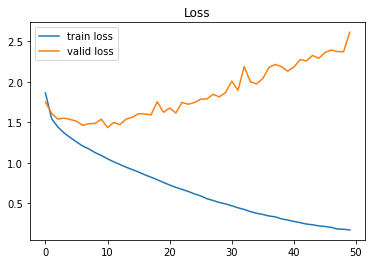

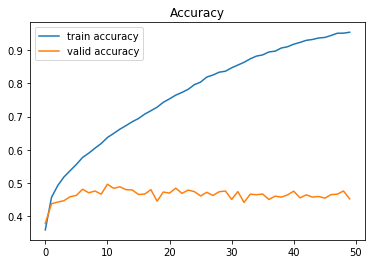

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [9]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [11]:
results = {}

for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %.6f" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch_size-%s" % str(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with BATCH_SIZE = 2.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10

50000/50000 [==============================] - 351s 7ms/step - loss: 2.2005 - acc: 0.1880 - val_loss: 3.0713 - val_acc: 0.2317
Experiment with BATCH_SIZE = 16.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)  

Epoch 49/50
50000/50000 [==============================] - 43s 864us/step - loss: 0.9840 - acc: 0.6465 - val_loss: 1.4377 - val_acc: 0.5128
Epoch 50/50
50000/50000 [==============================] - 43s 863us/step - loss: 0.9764 - acc: 0.6493 - val_loss: 1.5788 - val_acc: 0.4950
Experiment with BATCH_SIZE = 32.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2

50000/50000 [==============================] - 24s 481us/step - loss: 0.7170 - acc: 0.7433 - val_loss: 1.8486 - val_acc: 0.4782
Epoch 48/50
50000/50000 [==============================] - 24s 478us/step - loss: 0.7052 - acc: 0.7465 - val_loss: 1.7452 - val_acc: 0.4856
Epoch 49/50
50000/50000 [==============================] - 24s 471us/step - loss: 0.6997 - acc: 0.7491 - val_loss: 1.7322 - val_acc: 0.4934
Epoch 50/50
50000/50000 [==============================] - 25s 492us/step - loss: 0.7008 - acc: 0.7477 - val_loss: 1.7323 - val_acc: 0.4985
Experiment with BATCH_SIZE = 128.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalizat

Epoch 46/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.3162 - acc: 0.8925 - val_loss: 2.2517 - val_acc: 0.4698
Epoch 47/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.3014 - acc: 0.8994 - val_loss: 2.3422 - val_acc: 0.4627
Epoch 48/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.2890 - acc: 0.9045 - val_loss: 2.3577 - val_acc: 0.4694
Epoch 49/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.2734 - acc: 0.9113 - val_loss: 2.2404 - val_acc: 0.4794
Epoch 50/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.2606 - acc: 0.9135 - val_loss: 2.4552 - val_acc: 0.4603
Experiment with BATCH_SIZE = 256.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______________________________________________________________

50000/50000 [==============================] - 8s 159us/step - loss: 0.2542 - acc: 0.9281 - val_loss: 2.1514 - val_acc: 0.4819
Epoch 46/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.2423 - acc: 0.9325 - val_loss: 2.2738 - val_acc: 0.4767
Epoch 47/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.2319 - acc: 0.9362 - val_loss: 2.1459 - val_acc: 0.4888
Epoch 48/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.2215 - acc: 0.9386 - val_loss: 2.2188 - val_acc: 0.4798
Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.2119 - acc: 0.9419 - val_loss: 2.2798 - val_acc: 0.4869
Epoch 50/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.2040 - acc: 0.9448 - val_loss: 2.1800 - val_acc: 0.4896


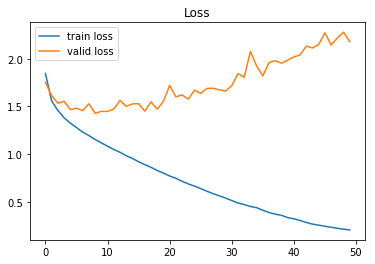

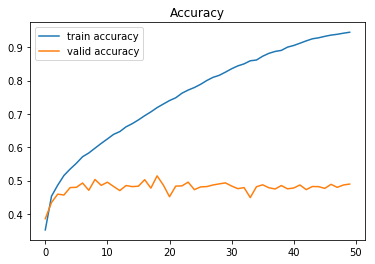

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()